Assignment: Exploratory data analysis (solutions)
=====================================



Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# TODO Q1
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=983f91a872702243'
df = pd.read_csv(url)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [ ]:
# TODO Q2
# use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588539 entries, 0 to 588538
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 587527 non-null  object 
 1   country_region                                      588539 non-null  object 
 2   sub_region_1                                        570989 non-null  object 
 3   sub_region_2                                        340022 non-null  object 
 4   iso_3166_2_code                                     213550 non-null  object 
 5   census_fips_code                                    340152 non-null  float64
 6   date                                                588539 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  451940 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   433044 non-n

In [ ]:
# TODO Q3
# use head()
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [ ]:
# TODO Q4
# df['date'] = ...
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588539 entries, 0 to 588538
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype         
---  ------                                              --------------   -----         
 0   country_region_code                                 587527 non-null  object        
 1   country_region                                      588539 non-null  object        
 2   sub_region_1                                        570989 non-null  object        
 3   sub_region_2                                        340022 non-null  object        
 4   iso_3166_2_code                                     213550 non-null  object        
 5   census_fips_code                                    340152 non-null  float64       
 6   date                                                588539 non-null  datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  451940 non-null  float64       

Next, you are going to extract the subset of data for the location of
your choice. You can choose any location *except* Brooklyn, New York.
(You can’t choose Brooklyn because the example code I’m about to show
you is for Brooklyn.)

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single location. You can go down to the
`sub_region_1` level or the `sub_region_2` level - depending on the
location you chose, the finer level of granularity may not be available.

In [ ]:
# TODO Q5
# df_subset =
# I used Kings County NY (Brooklyn) for the solutions, but you used a different location in your submission
df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

In [ ]:
# TODO Q6
# df_subset
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 430689 to 430818
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 130 non-null    object        
 1   country_region                                      130 non-null    object        
 2   sub_region_1                                        130 non-null    object        
 3   sub_region_2                                        130 non-null    object        
 4   iso_3166_2_code                                     0 non-null      object        
 5   census_fips_code                                    130 non-null    float64       
 6   date                                                130 non-null    datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  130 non-null    float64       
 8   gr

In [ ]:
min_dt = df_subset.date.min()
max_dt = df_subset.date.max()

In [ ]:
expected_range = pd.date_range(start = min_dt, end = max_dt, freq='D' )
missing_days = expected_range.difference(df_subset['date'])
print(missing_days)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? **Include a
short quote from the material you read in the “Learn about the data”
section to answer this question.**

---

For Brooklyn, NY (Kings County), the data is complete. There are no missing dates, and no rows with non-null data in the important fields.

In [About This Data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data), we learn:

> What data is included in the calculation depends on user settings, connectivity, and whether it meets our privacy threshold. When the data doesn't meet quality and privacy thresholds, you might see empty fields for certain places and dates.



For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in Brooklyn, New York, I might compute:

    days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

Compute “days since \[some relevant COVID-19 date\]” for your location.
In a comment, explain the significance of the date you have chosen, and
include a link to a news article or other reference supporting the
significance of the date. (The news article does not have to be in
English.)

In [ ]:
# TODO Q8
# days_since...
days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values


Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen.

In the following cell, create a figure with six subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

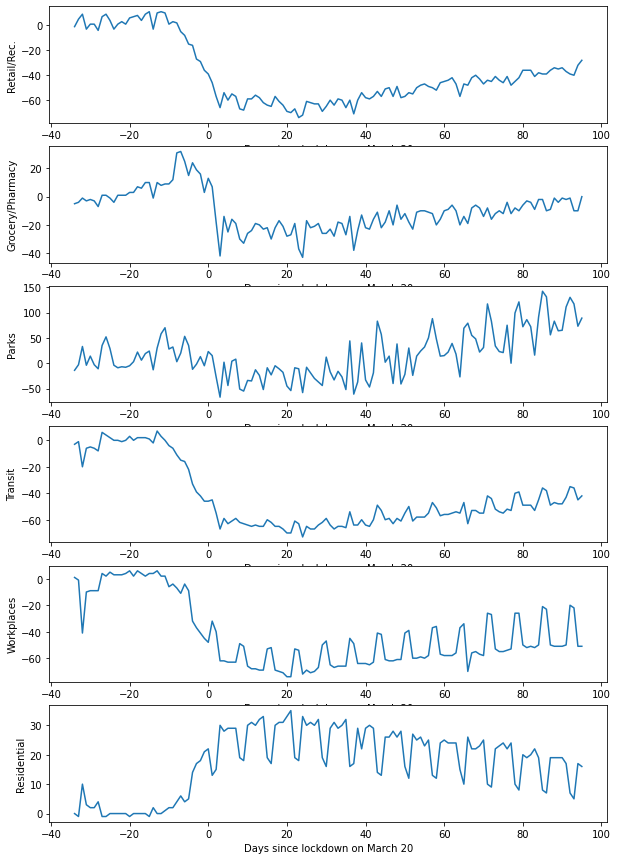

In [ ]:
# TODO Q9
plt.figure(figsize=(8,15));

plt.subplot(6,1,1);
sns.lineplot(days_since_lockdown, df_subset['retail_and_recreation_percent_change_from_baseline'])
plt.xlabel("Days since lockdown on March 20");
plt.ylabel("Retail/Rec.");

plt.subplot(6,1,2);
sns.lineplot(days_since_lockdown, df_subset['grocery_and_pharmacy_percent_change_from_baseline'])
plt.xlabel("Days since lockdown on March 20");
plt.ylabel("Grocery/Pharmacy");

plt.subplot(6,1,3);
sns.lineplot(days_since_lockdown, df_subset['parks_percent_change_from_baseline'])
plt.xlabel("Days since lockdown on March 20");
plt.ylabel("Parks");

plt.subplot(6,1,4);
sns.lineplot(days_since_lockdown, df_subset['transit_stations_percent_change_from_baseline'])
plt.xlabel("Days since lockdown on March 20");
plt.ylabel("Transit");

plt.subplot(6,1,5);
sns.lineplot(days_since_lockdown, df_subset['workplaces_percent_change_from_baseline'])
plt.xlabel("Days since lockdown on March 20");
plt.ylabel("Workplaces");


plt.subplot(6,1,6);
sns.lineplot(days_since_lockdown, df_subset['residential_percent_change_from_baseline'])
plt.xlabel("Days since lockdown on March 20");
plt.ylabel("Residential");

**TODO** Q10: Answer the following question: Do the results seem to
satisfy “common sense”? Explain, citing specific data from your plot to
support your answer.

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why the data might *not*
be useful for understanding the effect of COVID-19-related lockdowns, or
why the data might be misleading. For the location you have chosen,
briefly answer all of the questions in that checklist. Based on your
answers, do you think there are any serious problems associated with
using this data for understanding user mobility changes due to COVID-19?

---



**Q10**: The results seem to satisfy common sense. Some observations:

* We observe a gradual change in behavior before the lockdown on March 20, with people spending more time in residential location and less time in workplaces. This could reflect people staying home voluntarily to avoid infection, or because some schools and workplaces closed even before they were legally required to.
* After the lockdown date, there is a plateau as most people stay home. Then, after about a month of lockdown, we see a very slow increase in mobility outside of residential places (and a corresponding decrease in time in residential places).
* In the week before the lockdown, people seem to spend more time in grocery and pharmacy locations, possibly preparing for an extended lockdown.
* There is a periodic weekly pattern, because weekday behavior changes more from the pre-COVID period than weekend behavior. (People already stay home more on weekends.)
* Monday, February 17, 2020, appears as an anomaly near the beginning of the data. This day is a legal holiday, President's Day. Some workplaces and schools are closed, so people spend more time at home and less time in workplaces.

**Q11**: 

**Did anything significant happen between Jan 3 and Feb 6, 2020?**  

Monday, January 20, 2020 is a U.S. Federal Holiday, Martin Luther King, Jr. Day. NYC public schools are closed. However, since the baseline Monday is the median of 5 Mondays from Jan 3 to Feb 6, it shouldn't be badly affected by one atypical Monday.

**How do park visitors change from January to now?**

NYC gets warmer in April/May, so besides for the response to COVID-19, we would anyway expect to see an increase in time spent in parks around that time. 

(And we do, in fact, see that in the plots above - although we can't separate it from the COVID-19 response. If we had mobility data from spring and summer of previous years, we could potentially use that as a baseline instead, and better separate the weather response vs. the COVID-19 response.)


**How much more time do you think people will spend in residential places?** and 
**How might types of work affect the mobility changes on weekdays or weekends?**

NYC is a major metro area with many large industries: finance, retail, healthcare, higher education, to name a few. Some of these will have a stronger/different COVID-19 response than others. For example:

* **Healthcare** - NYC was a COVID-19 hotspot, and healthcare workers had to work longer shifts and spend less time at home.
* **Higher education** - Many schools in Brooklyn are primarily commuter, rather than residential, schools. We expect people who attend/work at these schools to spend more time at home and less time at "work".  For residential schools, however, dorms were closed in March and many students left NY, so they would not be represented at all in the NYC data after that point.
* **Finance** is a major industry in the NYC metro area, and many workers in this industry worked from home during the COVID-19 lockdown. 

To complicate matters, many residents of Brooklyn commute to jobs in other boroughs of NYC, and residents of other boroughs of NYC commute to jobs in Brooklyn. It's difficult to tease out the commuting effect.


**How well is your region represented?**

Kings County, NY is a major metro area and is very, very well represented in the Google Maps data.